c:\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


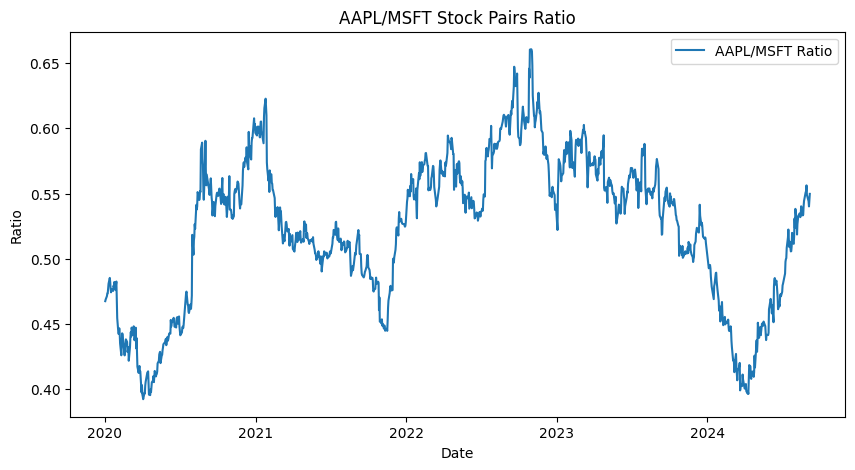

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

# getting historical data
stock_a = yf.download("AAPL", start="2020-01-01", end="2024-09-09")
stock_b = yf.download("MSFT", start="2020-01-01", end="2024-09-09")

# calculate stock pair ratio
stock_a['Ratio'] = stock_a['Close'] / stock_b['Close']

# ploting stock ratio
plt.figure(figsize=(10, 5))
plt.plot(stock_a['Ratio'], label="AAPL/MSFT Ratio")
plt.title('AAPL/MSFT Stock Pairs Ratio')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()

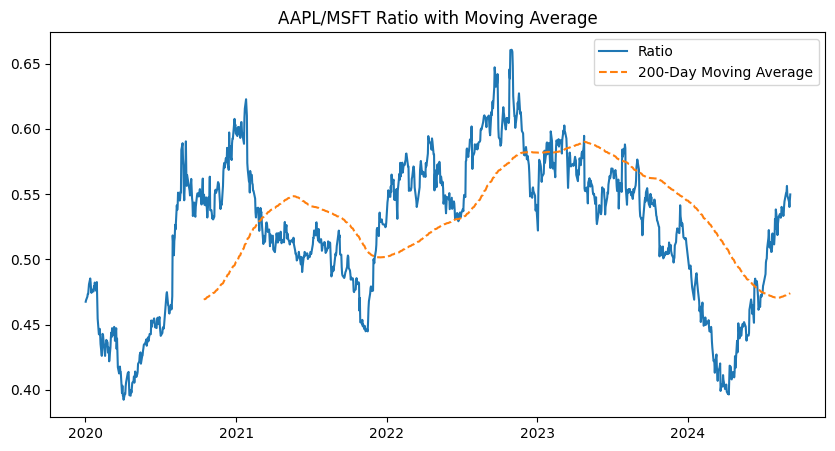

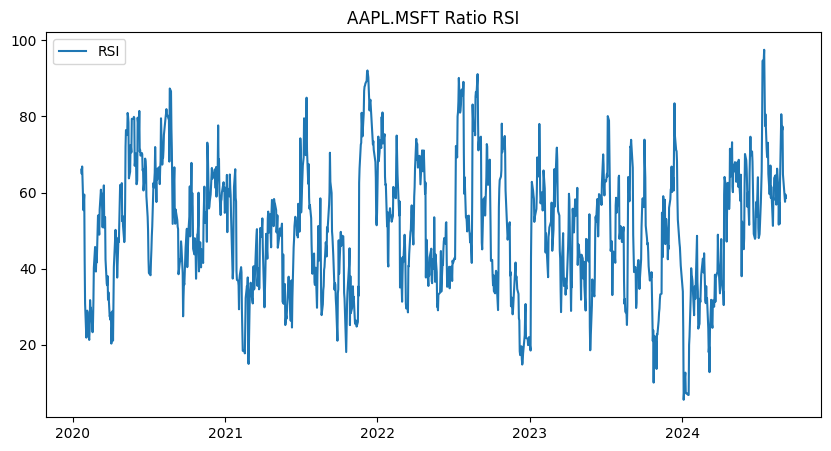

In [13]:
# 200-day moving average for ratio
stock_a['Ratio_MA_200'] = stock_a['Ratio'].rolling(window=200).mean()

# RSI for the ratio
def compute_RSI(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

stock_a['Ratio_RSI'] = compute_RSI(stock_a['Ratio'])

# visualize features
plt.figure(figsize=(10, 5))
plt.plot(stock_a['Ratio'], label="Ratio")
plt.plot(stock_a['Ratio_MA_200'], label="200-Day Moving Average", linestyle='--')
plt.title('AAPL/MSFT Ratio with Moving Average')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(stock_a['Ratio_RSI'], label="RSI")
plt.title('AAPL.MSFT Ratio RSI')
plt.legend()
plt.show()

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

# creating targets
stock_a.dropna(inplace=True)
features = stock_a[['Ratio', 'Ratio_MA_200', 'Ratio_RSI']]
target = stock_a['Ratio'].shift(-1)

# Drop last row with NaN values
features = features[:-1]
target = target[:-1]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [15]:
import tensorflow as tf
print(tf.__version__)

2.17.0


Epoch 1/10


C:\Users\juris\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1384
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018     
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


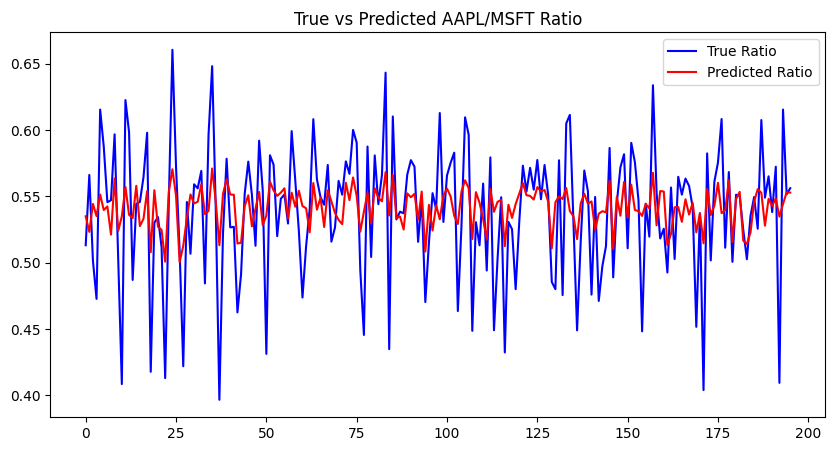

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM input (samples, timesteps, features)
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))  # Predict the next day's ratio

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Make predictions
predicted_ratios = model.predict(X_test_lstm)

# Visualize the predictions
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='True Ratio', color='blue')
plt.plot(predicted_ratios, label='Predicted Ratio', color='red')
plt.title('True vs Predicted AAPL/MSFT Ratio')
plt.legend()
plt.show()




In [17]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt

# Dowwnload data for AAPL and 
stock_symbols = ['AAPL', 'GOOG']
stock_data = yf.download(stock_symbols, start="2015-01-01", end="2024-09-09")

# keeping only closing prices
stock_data = stock_data['Adj Close']


c:\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


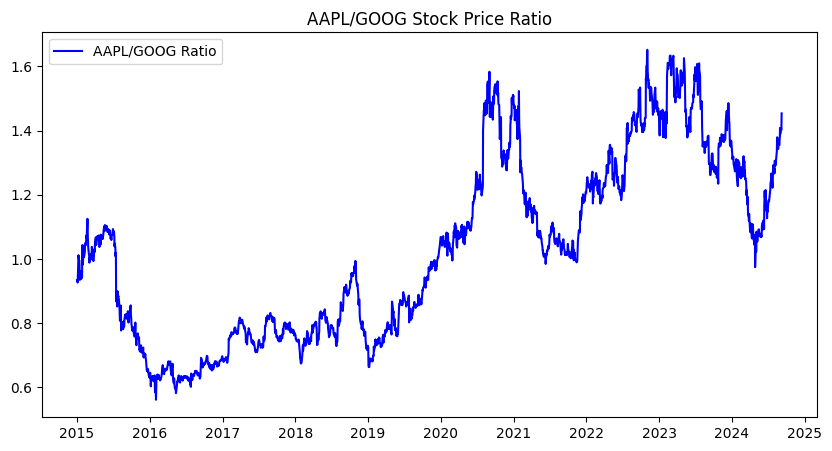

In [18]:
# adding more stock for a test
stock_b = stock_data[['AAPL', 'GOOG']]
stock_b['Ratio'] = stock_b['AAPL'] / stock_b['GOOG']

# plotting new pair
plt.figure(figsize=(10,5))
plt.plot(stock_b['Ratio'], label='AAPL/GOOG Ratio', color='blue')
plt.title('AAPL/GOOG Stock Price Ratio')
plt.legend()
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Rescale the 'Ratio' data to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_b['Ratio'].dropna().values.reshape(-1, 1))

# Create sequences for training the model 
sequence_length = 60
X = []
y = []

# Loop through the scaled data to create the sequences and labels
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0]) 
    y.append(scaled_data[i, 0]) 

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to be compatible with LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [20]:
from sklearn.model_selection import train_test_split

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)